# Prediction Observation Classification Pipeline

- **Goal:** Prediction Classification

In [1]:
import os
import sys

import pandas as pd


from pathlib import Path
from IPython.display import Image

# Get the current working directory of the notebook
notebook_dir = os.getcwd()
# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

import log_files
from data_processing import DataProcessing
from feature_extraction import TfidfFeatureExtraction, SpacyFeatureExtraction
from classification_models import SkLearnPerceptronModel, SkLearnSGDClassifier, EvaluationMetric

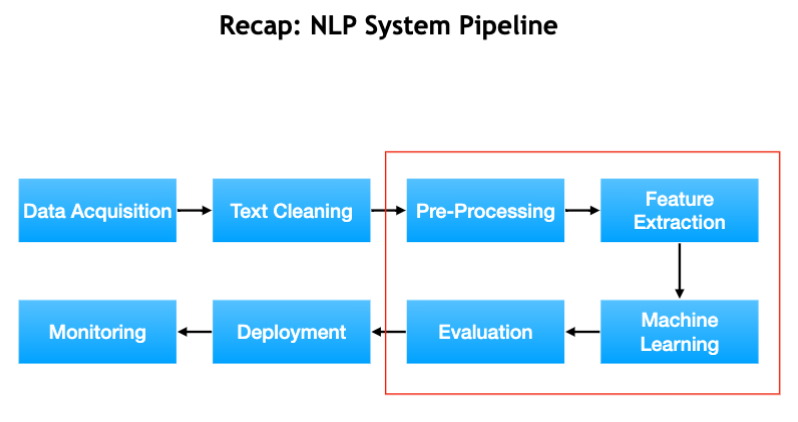

In [2]:
Image(filename='../misc/base_pipeline.png')

## 1-Data Acquisition

In [3]:
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
log_file_path = "data/prediction_logs"
predictions = True
predictions_df = log_files.read_data(notebook_dir, log_file_path, predictions)
predictions_df.head(7)

Start logging batch
log_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_1-predictions
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_1-predictions/batch_1-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_2-predictions
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_2-predictions/batch_2-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_3

,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
0,"On August 21, 2024, as a financial analyst, I predict that the revenue at Amazon will potentially decrease in Q3 of 2027.",1,finance,gpt-3.5-turbo,NAVI_GATOR,0,1
1,"On 2024-08-21, Morgan Stanley speculates the operating income at Amazon will likely increase.",1,finance,gpt-4o,NAVI_GATOR,0,2
2,"According to JPMorgan Chase, the net profit at Microsoft is expected to decrease in Q2 of 2024.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,1
3,"On August 21, 2023, Goldman Sachs speculates that the stock price at Amazon will likely increase.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,2
4,"George, a financial analyst, predicts that on 01/15/2024, the Google revenue may rise.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,3
5,"According to BlackRock, the operating cash flow at ExxonMobil would fall in Q3 2023.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,4
6,"In Q2 2023, Wells Fargo envisions that the stock price at Tesla has some probability to remain stable.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,5


In [5]:
log_file_path = "data/observation_logs"
predictions = False
observations_df = log_files.read_data(notebook_dir, log_file_path, predictions)
observations_df.head(7)

Start logging batch
log_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs/batch_1-observations
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs/batch_1-observations/batch_1-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs/batch_2-observations
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs/batch_2-observations/batch_2-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_lo

,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
0,"The financial reporter, Sarah, witnessed the stock price at Tesla plummeted in Q2 of 2023.",0,finance,gpt-3.5-turbo,NAVI_GATOR,0,1
1,"From May 15, 2025, the financial analyst speculated the net profit at Amazon was drastically different.",0,finance,gpt-3.5-turbo,NAVI_GATOR,0,2
2,"On July 1, 2024, the financial expert heard that the revenue at Google remained stable.",0,finance,gpt-3.5-turbo,NAVI_GATOR,0,5
3,"Apple's operating income generally rose in August 21, 2027, according to the financial top executive.",0,finance,gpt-3.5-turbo,NAVI_GATOR,0,6
4,Goldman Sachs saw the net profit at Tesla plummeted in 2023-11-15.,0,finance,gpt-4o,NAVI_GATOR,0,1
5,"From 2025-03-30, Morgan Stanley speculated the gross profit at Apple was drastically different.",0,finance,gpt-4o,NAVI_GATOR,0,2
6,"2026/12/01, a financial analyst heard that the operating income at Amazon remained stable.",0,finance,gpt-4o,NAVI_GATOR,0,5


## 2-Data Processing

In [6]:
pred_obs_dfs = [predictions_df, observations_df]
base_df = DataProcessing.concat_dfs(pred_obs_dfs)
shuffled_base_df = DataProcessing.shuffle_df(base_df)
shuffled_base_df.head(7)

,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
0,"In 2027, a research advisor, John, heard that the poverty rate in rural areas remained stable.",0,policy,mixtral-8x7b-instruct,NAVI_GATOR,0,5
1,"According to the meteorological team at the National Weather Service, the precipitation levels in New York will likely decrease in 08/21/2024.",1,weather,mixtral-8x7b-instruct,NAVI_GATOR,0,1
2,The CDC noticed that the obesity rates among children in Texas plummeted in the third quarter of 2025.,0,health,gpt-3.5-turbo,NAVI_GATOR,0,1
3,"From May 15, 2025, the financial analyst speculated the net profit at Amazon was drastically different.",0,finance,gpt-3.5-turbo,NAVI_GATOR,0,2
4,"John, a financial expert, predicts that the net profit at Amazon will potentially decrease in Q3 of 2027.",1,finance,gpt-3.5-turbo,NAVI_GATOR,0,1
5,"The number of renewable energy projects generally rose in 2028, according to the Department of Energy.",0,policy,mixtral-8x7b-instruct,NAVI_GATOR,0,6
6,The weather expert observed that the humidity in Houston generally rose in the past week.,0,weather,gpt-3.5-turbo,NAVI_GATOR,0,6


## 3-Feature Extraction

### TF x IDF

In [7]:
max_features = None

tf_idf_feature_extractor = TfidfFeatureExtraction(shuffled_base_df, 'Base Sentence')
tfidf_vectorized_features = tf_idf_feature_extractor.word_feature_extraction(max_features)
tfidf_vectorized_features_df = tf_idf_feature_extractor.feature_scores(max_features)
tfidf_vectorized_features_df.head(7)

,Base Sentence,Sentence Label,01,03,04,05,06,07,08,09,10,11,12,15,19,2015,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,21,22,24,30,accessibility,according,accumulated,accuweather,acquisitions,activists,activity,adams,adopt,adults,advisor,advocates,african,aged,agreements,alex,alice,allergies,allergy,alphabet,amazon,america,american,among,analysis,analyst,analytics,and,angeles,apple,areas,as,association,asthma,at,august,average,awareness,based,be,being,below,between,blackrock,boston,breaches,buffett,bureau,by,ca,cafeteria,california,cardiovascular,carter,cash,cdc,center,centers,central,change,changes,channel,chase,chen,chicago,children,china,choices,cholesterol,chronic,city,claire,clara,clean,cleveland,climate,clinic,clinics,club,cnbc,coastal,college,community,company,compared,compliance,concerning,confidence,considerable,considerably,consistent,consumer,corporations,costs,council,countries,cramer,current,customer,cybersecurity,dallas,date,dave,david,day,december,declined,decrease,defense,department,desert,detection,detroit,developing,development,diabetes,dietary,diets,different,diseases,doe,downtown,dr,drastically,drop,due,early,earnings,economic,economist,education,efforts,elderly,electric,emerging,emily,emphasizing,energy,engagement,environment,environmental,environmentalist,envision,envisions,even,executive,expected,expenditure,expenses,expert,experts,exxonmobil,facilities,fall,fargo,finance,financial,first,fitness,flow,fluctuations,for,forecasts,foresees,fostering,francisco,from,funding,gdp,general,generally,george,given,global,goldman,google,government,greentech,gross,group,growth,gupta,gym,habits,had,half,has,have,health,healthcare,healthier,heard,heart,high,higher,hopkins,hospitals,hours,houston,humidity,illnesses,immunology,impact,impacts,improved,in,inc,income,increase,increasing,initiatives,insights,institute,institutions,intake,intervention,is,issues,it,james,jane,january,jim,john,johns,johnson,jpmorgan,july,june,kim,last,leading,lee,legislative,level,levels,lifestyle,lifestyles,likely,lisa,local,logistics,los,maria,mark,markets,marketwatch,may,mayo,me,medical,medlab,mendez,mental,mergers,meteorological,meteorologist,metrics,mi,miami,microsoft,midnight,midwest,mike,minor,month,months,more,morgan,mountain,mr,national,need,net,new,news,next,nih,north,noted,noticed,noticing,noting,november,number,nurse,nutrition,nutritional,obesity,observed,october,of,on,only,operating,or,organization,organizations,orleans,over,overall,particularly,past,patel,patients,people,period,person,phoenix,physical,plummeted,policy,population,positive,potential,potentially,poverty,precipitation,predict,predicted,predicts,prevalence,preventative,price,primary,probability,profit,projects,prominent,public,published,q1,q2,q3,q4,quarter,rachel,rainy,range,rate,rates,recent,reform,reforms,region,regulations,regulatory,relatively,released,remain,remained,renewable,report,reported,reporter,requirements,research,researcher,retail,revealed,revenue,reynolds,ridership,rise,robert,rodriguez,rose,rural,sachs,sales,sam,samantha,same,samuel,san,sanjay,sarah,satisfaction,saw,school,screenings,seasonal,seasoned,seattle,second,sector,sedentary,senior,seniors,september,service,should,significant,significantly,similar,since,six,smith,smokers,snow,sofia,sold,some,southern,speculate,speculated,speculates,speed,spending,stable,stanley,states,station,stay,stock,stores,strategist,student,study,suggested,summer,support,supportive,susan,sustainability,tank,team,techco,technology,temperature,tesla,texas,than,that,the,their,think,third,thomas,throughout,time,to,top,trade,trading,transportation,trend,trends,turnout,two,uk,unemployment,unhealthy,united,university,unseasonable,upcoming,urban,us,usage,usual,utilities,vaccination,various,vehicles,volume,voter,walmart,walton,warren,was,weather,week,well,wellness,wells,were,who,will,wind,with,within,witnessed,work,world,would,year,years,york,youth
0,"In 2027, a research advisor, John, heard that the poverty rate

### POS and NER

In [8]:
pos_ner_feature_extractor = SpacyFeatureExtraction(shuffled_base_df, "Base Sentence")
sentences = DataProcessing.df_to_list(shuffled_base_df, 'Base Sentence')
word_leveL_disable_components = ["lemmatizer"]
all_pos_tags, word_to_pos_mapping, all_ner_entities, word_to_ner_mappings =  pos_ner_feature_extractor.extract_features(data=sentences, disable_components=word_leveL_disable_components)
pos_df = DataProcessing.convert_to_df(all_pos_tags, mapping=word_to_pos_mapping)
ner_df = DataProcessing.convert_to_df(all_ner_entities, word_to_ner_mappings)
pos_ner_features = [pos_df, ner_df]
pos_ner_features_df = DataProcessing.concat_dfs(pos_ner_features, axis=1, ignore_index=False)
pos_ner_features_df.head(7)

Spacy Doc (0):  In 2027, a research advisor, John, heard that the poverty rate in rural areas remained stable.
Spacy Doc (1):  According to the meteorological team at the National Weather Service, the precipitation levels in New York will likely decrease in 08/21/2024.
Spacy Doc (2):  The CDC noticed that the obesity rates among children in Texas plummeted in the third quarter of 2025.
Spacy Doc (3):  From May 15, 2025, the financial analyst speculated the net profit at Amazon was drastically different.


,NOUN_5,PUNCT_3,PROPN_3,CCONJ_1,ADJ_5,PART_2,ADP_2,VERB_4,SCONJ_2,NOUN_6,ADP_8,ADJ_2,PART_1,PUNCT_2,DET_2,ADJ_3,SYM_1,NOUN_7,PRON_1,VERB_3,PROPN_7,DET_1,SYM_2,PROPN_5,DET_4,NUM_1,NUM_3,NOUN_1,AUX_2,PROPN_4,VERB_5,AUX_1,PUNCT_6,ADJ_4,NOUN_3,ADP_4,ADP_1,NUM_2,NOUN_8,PROPN_6,ADJ_6,NOUN_2,SCONJ_1,NOUN_4,ADJ_1,ADP_3,ADP_6,VERB_1,DET_3,VERB_2,ADV_1,PUNCT_5,ADP_5,ADP_7,DET_5,PUNCT_4,PUNCT_1,PROPN_1,PROPN_2,GPE_2,PERCENT_1,ORG_3,EVENT_1,CARDINAL_1,PERSON_1,DATE_1,FAC_1,TIME_1,DATE_2,LOC_1,GPE_1,NORP_1,ORG_2,ORG_1
0,areas,",",NaN,NaN,NaN,NaN,in,NaN,NaN,NaN,NaN,stable,NaN,",",the,NaN,NaN,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,2027,NaN,research,NaN,NaN,NaN,NaN,NaN,NaN,poverty,NaN,In,NaN,NaN,NaN,NaN,advisor,that,rate,rural,NaN,NaN,heard,NaN,remained,NaN,NaN,NaN,NaN,NaN,.,",",John,NaN,NaN,NaN,NaN,NaN,NaN,John,2027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Service,NaN,NaN,NaN,at,NaN,NaN,NaN,NaN,NaN,NaN,.,the,NaN,NaN,NaN,NaN,NaN,NaN,the,NaN,York,NaN,08/21/2024,NaN,team,NaN,New,NaN,will,NaN,NaN,levels,in,to,NaN,NaN,NaN,NaN,precipitation,NaN,NaN,meteorological,in,NaN,According,the,decrease,likely,NaN,NaN,NaN,NaN,NaN,",",National,Weather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/21/2024,NaN,NaN,New York,NaN,NaN,the National Weather Service
2,NaN,NaN,NaN,NaN,NaN,NaN,in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the,NaN,NaN,NaN,NaN,NaN,NaN,The,NaN,NaN,NaN,2025,NaN,obesity,NaN,NaN,NaN,NaN,NaN,NaN,children,of,among,NaN,NaN,NaN,NaN,rates,that,quarter,third,in,NaN,noticed,the,plummeted,NaN,NaN,NaN,NaN,NaN,NaN,.,CDC,Texas,NaN,NaN,NaN,NaN,NaN,NaN,the third quarter of 2025,NaN,NaN,NaN,NaN,Texas,NaN,NaN,CDC
3,NaN,.,NaN,NaN,NaN,NaN,at,NaN,NaN,NaN,NaN,net,NaN,",",the,different,NaN,NaN,NaN,NaN,NaN,the,NaN,NaN,NaN,15,NaN,analyst,NaN,NaN,NaN,was,NaN,NaN,NaN,NaN,From,2025,NaN,NaN,NaN,profit,NaN,NaN,financial,NaN,NaN,speculated,NaN,NaN,drastically,NaN,NaN,NaN,NaN,NaN,",",May,Amazon,NaN,NaN,NaN,NaN,NaN,NaN,"May 15, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon
4,NaN,.,Q3,NaN,NaN,NaN,in,NaN,NaN,NaN,NaN,net,NaN,",",the,NaN,NaN,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,2027,NaN,expert,NaN,NaN,NaN,will,NaN,NaN,NaN,NaN,at,NaN,NaN,NaN,NaN,profit,that,NaN,financial,of,NaN,predicts,NaN,decrease,potentially,NaN,NaN,NaN,NaN,NaN,",",John,Amazon,NaN,NaN,NaN,NaN,NaN,John,2027,NaN,NaN,NaN,NaN,Q3,NaN,NaN,Amazon
5,NaN,NaN,NaN,NaN,NaN,NaN,in,NaN,NaN,NaN,NaN,NaN,NaN,.,the,NaN,NaN,NaN,NaN,NaN,NaN,The,NaN,NaN,NaN,2028,NaN,number,NaN,NaN,NaN,NaN,NaN,NaN,projects,of,of,NaN,NaN,NaN,NaN,energy,NaN,NaN,renewable,to,NaN,rose,NaN,according,generally,NaN,NaN,NaN,NaN,NaN,",",Department,Energy,NaN,NaN,NaN,NaN,NaN,NaN,2028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the Department of Energy
6,NaN,NaN,NaN,NaN,NaN,NaN,in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the,NaN,NaN,NaN,NaN,NaN,NaN,The,NaN,NaN,NaN,NaN,NaN,weather,NaN,NaN,NaN,NaN,NaN,NaN,humidity,NaN,in,NaN,NaN,NaN,NaN,expert,that,week,past,NaN,NaN,observed,the,rose,generally,NaN,NaN,NaN,NaN,NaN,.,Houston,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the past week,NaN,NaN,NaN,NaN,Houston,NaN,NaN,NaN


In [10]:
encoded_pos_ner_df = DataProcessing.encode_tags_entities_df(pos_ner_features_df, sentence_and_label_df=shuffled_base_df)
encoded_pos_ner_df.head(3)

,Base Sentence,Sentence Label,NOUN_5,PUNCT_3,PROPN_3,CCONJ_1,ADJ_5,PART_2,ADP_2,VERB_4,SCONJ_2,NOUN_6,ADP_8,ADJ_2,PART_1,PUNCT_2,DET_2,ADJ_3,SYM_1,NOUN_7,PRON_1,VERB_3,PROPN_7,DET_1,SYM_2,PROPN_5,DET_4,NUM_1,NUM_3,NOUN_1,AUX_2,PROPN_4,VERB_5,AUX_1,PUNCT_6,ADJ_4,NOUN_3,ADP_4,ADP_1,NUM_2,NOUN_8,PROPN_6,ADJ_6,NOUN_2,SCONJ_1,NOUN_4,ADJ_1,ADP_3,ADP_6,VERB_1,DET_3,VERB_2,ADV_1,PUNCT_5,ADP_5,ADP_7,DET_5,PUNCT_4,PUNCT_1,PROPN_1,PROPN_2,GPE_2,PERCENT_1,ORG_3,EVENT_1,CARDINAL_1,PERSON_1,DATE_1,FAC_1,TIME_1,DATE_2,LOC_1,GPE_1,NORP_1,ORG_2,ORG_1
0,"In 2027, a research advisor, John, heard that the poverty rate in rural areas remained stable.",0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1,"According to the meteorological team at the National Weather Service, the precipitation levels in New York will likely decrease in 08/21/2024.",1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,The CDC noticed that the obesity rates among children in Texas plummeted in the third quarter of 2025.,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [11]:
comparison_result = (tfidf_vectorized_features_df.iloc[:, :2] == encoded_pos_ner_df.iloc[:, :2]).all().all()
comparison_result

np.True_

In [ ]:
# If we don't, the sentence and label cols will be duplicated. Confirm that the first two columns are the same in both dataframes, so we can use the columns from the tfidf_vectorized_features_df dataframe.

updated_encoded_word_level_tags_entities_df = encoded_pos_ner_df.iloc[:, 2:]
updated_encoded_word_level_tags_entities_df

## 3-Data Processing

In [ ]:
shuffled_base_df = DataProcessing.shuffle_df(base_df)
shuffled_base_df.head(33)

## 4-Feature Extraction at Word-Level

### TF x IDF

In [ ]:
max_features = None

tf_idf_feature_extractor = TfidfFeatureExtraction(shuffled_base_df, 'Base Sentence')
tfidf_vectorized_features = tf_idf_feature_extractor.word_feature_extraction(max_features)
# tfidf_vectorized_features

In [ ]:
tfidf_vectorized_features_df = tf_idf_feature_extractor.feature_scores(max_features)
tfidf_vectorized_features_df.head(7)

### Part-of-Speech (POS) Tags and Named Entity Recognition (NER) Entities

In [ ]:
# initialize the spacy model
spacy_feature_extractor = SpacyFeatureExtraction(shuffled_base_df, 'Base Sentence')
# spacy_feature_extractor

In [ ]:
only_predictions = DataProcessing.df_to_list(shuffled_base_df, 'Base Sentence')
# only_predictions

In [ ]:
word_leveL_disable_components = ["lemmatizer"]
word_level_pos_tags, word_level_pos_mappings, word_level_ner_entities, word_level_ner_mappings = spacy_feature_extractor.extract_entities(only_predictions, word_leveL_disable_components)

#### Visualize POS

In [ ]:
all_word_level_pos_df = DataProcessing.convert_to_df(word_level_pos_tags, mapping=word_level_pos_mappings)
all_word_level_pos_df.head(7)

#### Visualize NER

In [ ]:
all_word_level_ner_df = DataProcessing.convert_to_df(word_level_ner_entities, word_level_ner_mappings)
all_word_level_ner_df.head(7)

### Encode POS and NER

In [ ]:
word_level_tags_entities = [all_word_level_pos_df, all_word_level_ner_df]
word_level_tags_entities_df = DataProcessing.concat_dfs(word_level_tags_entities, axis=1, ignore_index=False)
word_level_tags_entities_df.head(7)

In [ ]:
encoded_word_level_tags_entities_df = DataProcessing.encode_tags_entities_df(word_level_tags_entities_df, sentence_and_label_df=shuffled_base_df)
encoded_word_level_tags_entities_df.head(7)

### Combine Features (TF x IDF and POS & NER Encodings)

In [ ]:
comparison_result = (tfidf_vectorized_features_df.iloc[:, :2] == encoded_word_level_tags_entities_df.iloc[:, :2]).all().all()
comparison_result

In [ ]:
# If we don't, the sentence and label cols will be duplicated. Confirm that the first two columns are the same in both dataframes, so we can use the columns from the tfidf_vectorized_features_df dataframe.

updated_encoded_word_level_tags_entities_df = encoded_word_level_tags_entities_df.iloc[:, 2:]
updated_encoded_word_level_tags_entities_df

In [ ]:
sentence_label_features_df = DataProcessing.concat_dfs([tfidf_vectorized_features_df, updated_encoded_word_level_tags_entities_df], axis=1)
sentence_label_features_df.head(7)

## Models

1. Perceptron

---

- Split: 80% train and 20% test

In [ ]:
X_train, X_test, y_train, y_test = DataProcessing.split_data(sentence_label_features_df, sentence_label_features_df[2])
X_train.head(33)

In [ ]:
def split_sentence_label_features(df: pd.DataFrame) -> tuple:
    sentences = df[0]
    prediction_labels = df[1]
    features_df = df.iloc[:, 2:]
    return sentences, prediction_labels, features_df

X_train_sentences, y_train_prediction_labels, X_train_features_df = split_sentence_label_features(X_train)

In [ ]:
# y_train_prediction_labels

In [ ]:
X_test_sentences, y_test_prediction_labels, X_test_features_df = split_sentence_label_features(X_test)
X_test_sentences

In [ ]:
y_test_prediction_labels

In [ ]:
perception_model = SkLearnPerceptronModel()
perception_model.train_model(X_train_features_df, y_train_prediction_labels)
perceptron_predictions = perception_model.predict(X_test_features_df)
perceptron_predictions.to_numpy().ravel()
perceptron_predictions

In [ ]:
sgd_model = SkLearnSGDClassifier()
sgd_model.train_model(X_train_features_df, y_train_prediction_labels)
sgd_predictions = sgd_model.predict(X_test_features_df)
sgd_predictions.to_numpy().ravel()
sgd_predictions

In [ ]:
model_predictions_df = pd.concat([X_test_sentences, y_test_prediction_labels], axis=1)
model_predictions_df.columns = ['Sentence', 'Actual Label']

model_predictions_df

In [ ]:
model_predictions_df['Perceptron Predicted Label'] = perceptron_predictions.to_numpy().ravel()
model_predictions_df['SGD Predicted Label'] = sgd_predictions.to_numpy().ravel()
model_predictions_df

## Evaluation

In [ ]:
get_metrics = EvaluationMetric()

In [ ]:
metrics = get_metrics.eval_classification_report(y_test_prediction_labels, perceptron_predictions)
metrics

In [ ]:
metrics = get_metrics.eval_classification_report(y_test_prediction_labels, sgd_predictions)
metrics